In [1]:
from plantcv import plantcv as pcv

In [2]:
pcv.params.debug='plot'

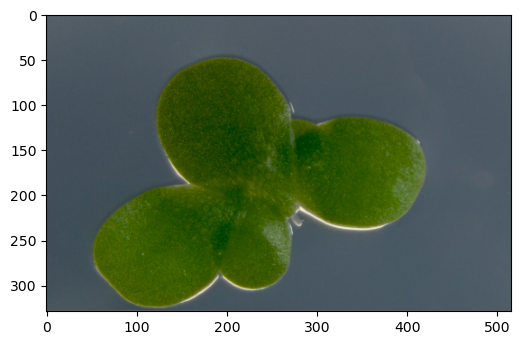

In [6]:
img, path, img_filename = pcv.readimage(filename="/users/jordanmanchengo/data/duckweed1.png")

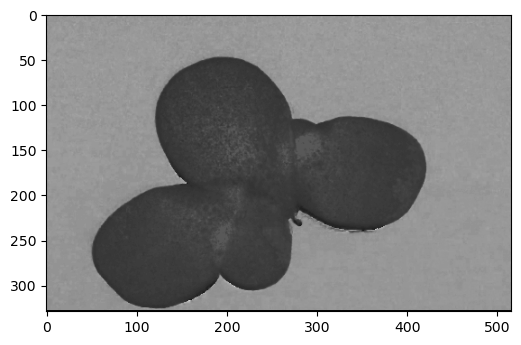

In [11]:
h = pcv.rgb2gray_hsv(rgb_img=img, channel='h')

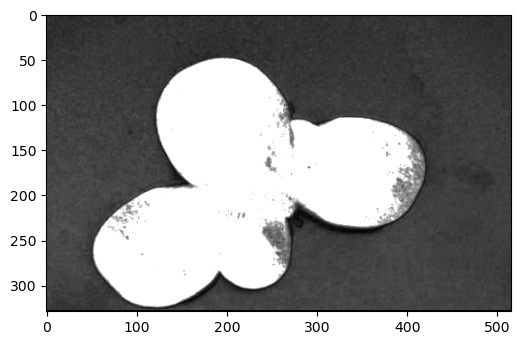

In [12]:
s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')

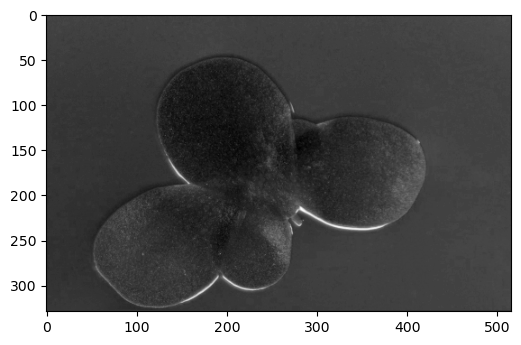

In [13]:
v = pcv.rgb2gray_hsv(rgb_img=img, channel='v')

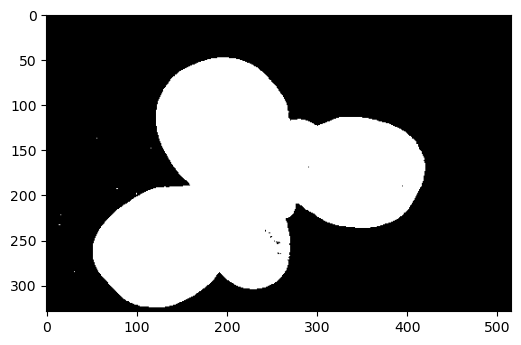

In [14]:
s_thresh = pcv.threshold.binary(gray_img=s, threshold=85, max_value=255, object_type='light')

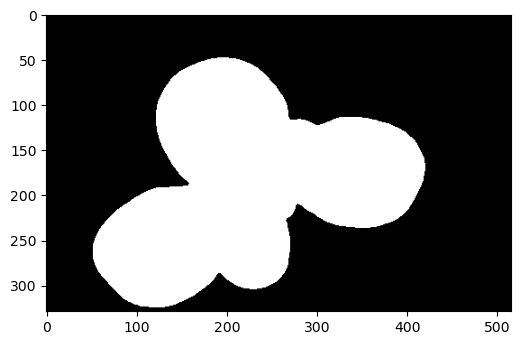

In [20]:
s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=5)

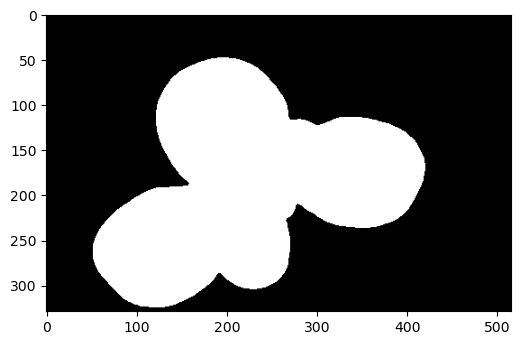

In [21]:
s_cnt = pcv.median_blur(gray_img=s_thresh, ksize=5)

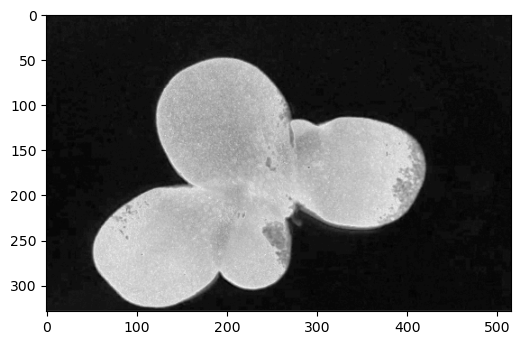

In [15]:
b = pcv.rgb2gray_lab(rgb_img=img, channel='b')

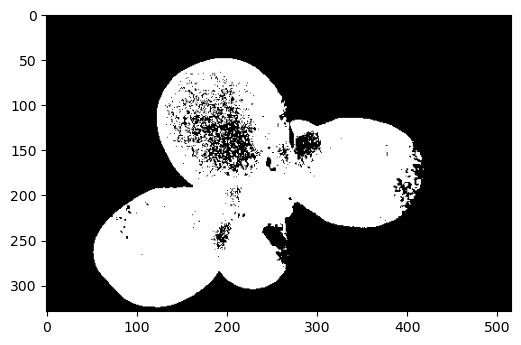

In [16]:
b_thresh = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, 
                                object_type='light')

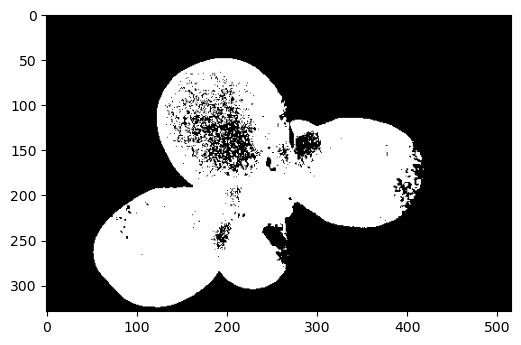

In [17]:
b_cnt = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, 
                                object_type='light')

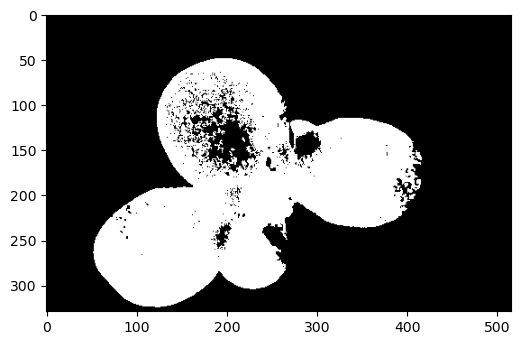

In [18]:
b_fill = pcv.fill(b_thresh, 10)

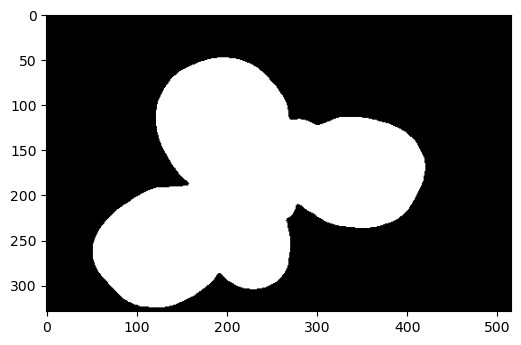

In [22]:
bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_cnt)

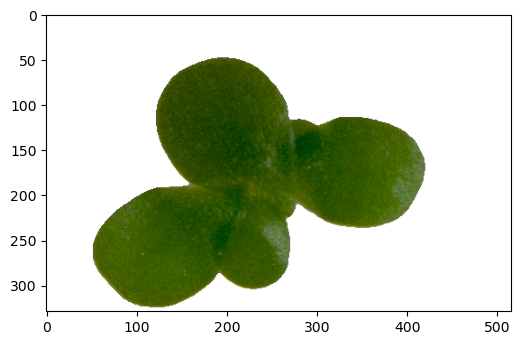

In [24]:
masked = pcv.apply_mask(img=img, mask=bs, mask_color='white')

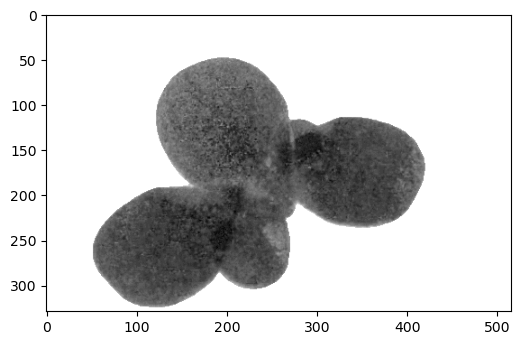

In [25]:
masked_a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')

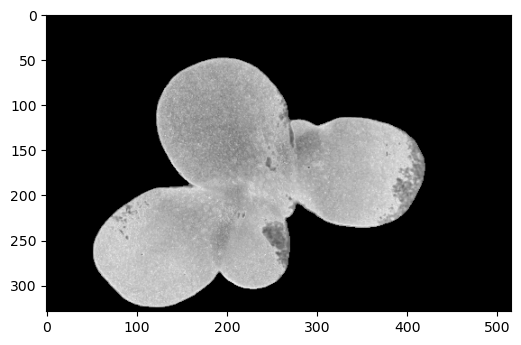

In [26]:
masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')

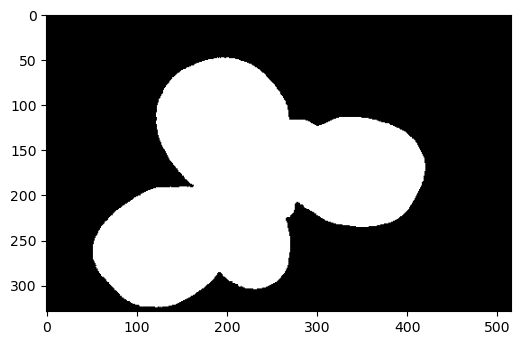

In [27]:
maskeda_thresh = pcv.threshold.binary(gray_img=masked_a, threshold=115, 
                                      max_value=255, object_type='dark')

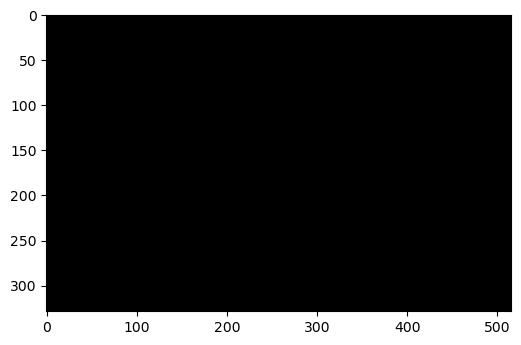

In [28]:
maskeda_thresh1 = pcv.threshold.binary(gray_img=masked_a, threshold=135, 
                                           max_value=255, object_type='light')

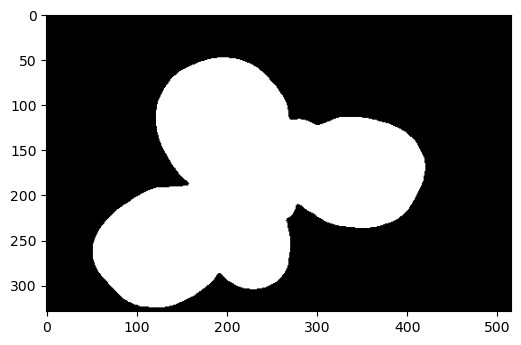

In [29]:
maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=128, 
                                          max_value=255, object_type='light')

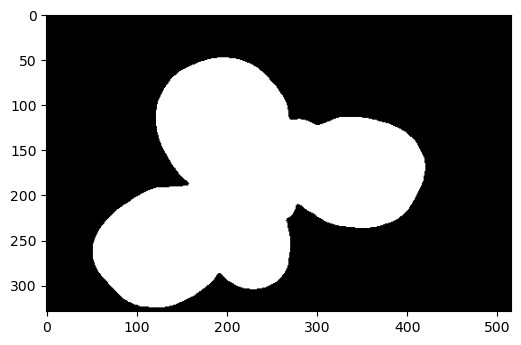

In [30]:
ab1 = pcv.logical_or(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)

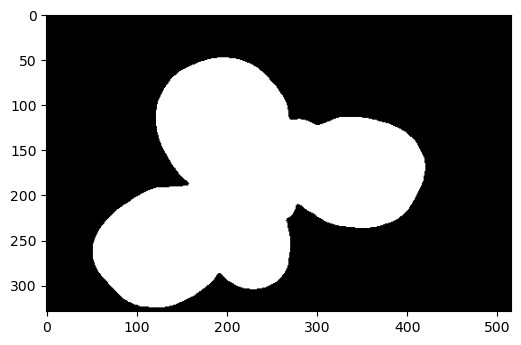

In [31]:
ab = pcv.logical_or(bin_img1=maskeda_thresh1, bin_img2=ab1)

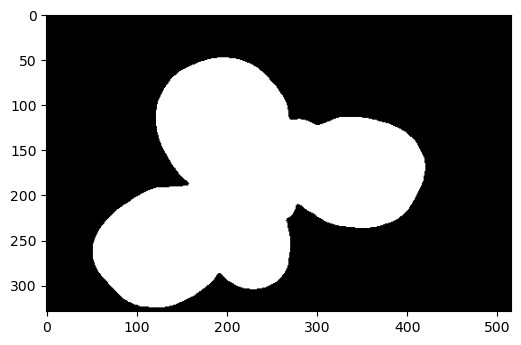

In [32]:
ab_fill = pcv.fill(bin_img=ab, size=200)

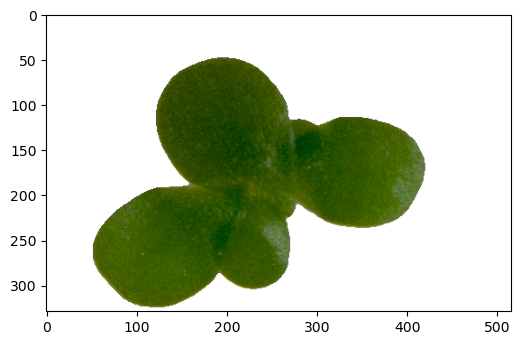

In [34]:
masked2 = pcv.apply_mask(img=masked, mask=ab_fill, mask_color='white')

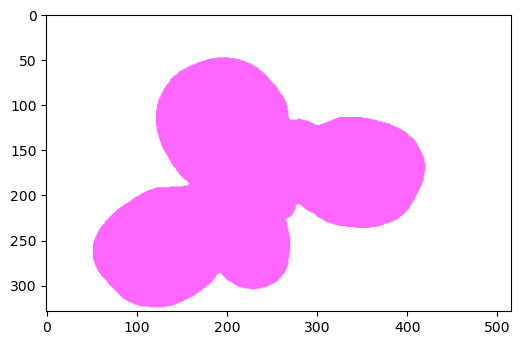

In [35]:
id_objects, obj_hierarchy = pcv.find_objects(masked2, ab_fill)

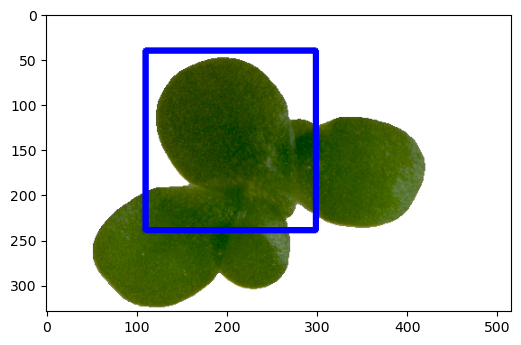

In [46]:
roi1, roi_hierarchy= pcv.roi.rectangle(img=masked2, x=110, y=40, h=200, w=190)

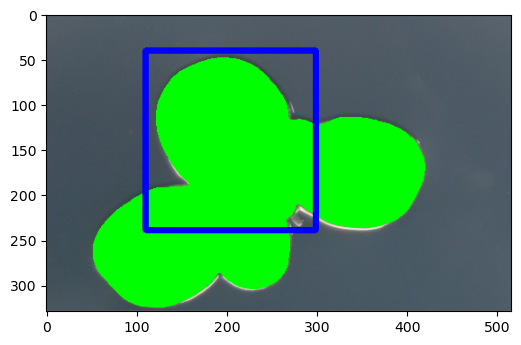

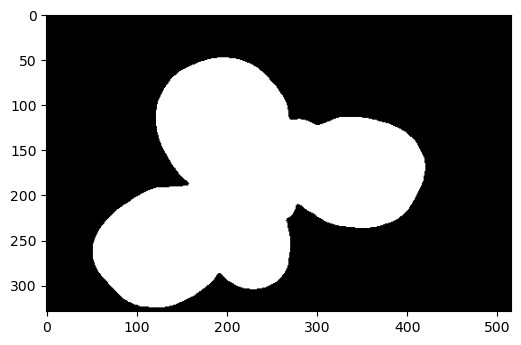

In [47]:
roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1, 
                                                                   roi_hierarchy=roi_hierarchy, 
                                                                   object_contour=id_objects, 
                                                                   obj_hierarchy=obj_hierarchy,
                                                                   roi_type='partial')


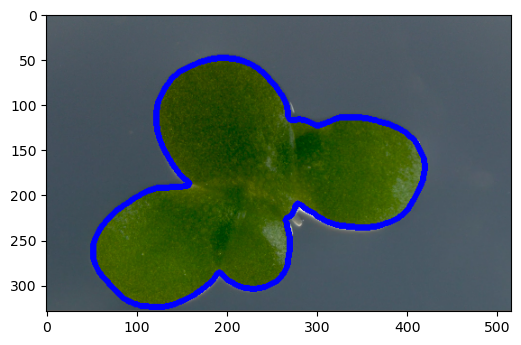

In [48]:
obj, mask = pcv.object_composition(img=img, contours=roi_objects, hierarchy=hierarchy3)

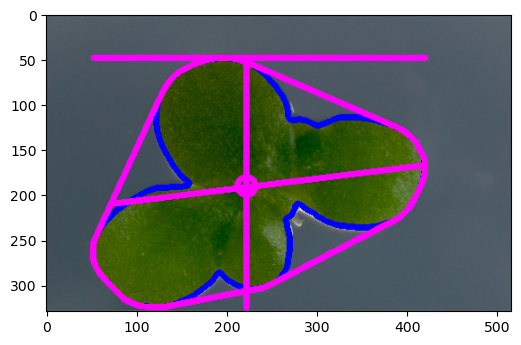

In [49]:
shape_img = pcv.analyze_object(img=img, obj=obj, mask=mask)

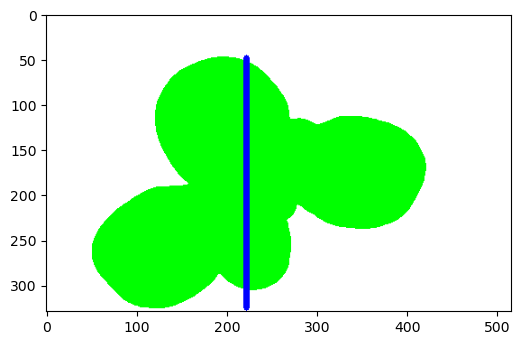

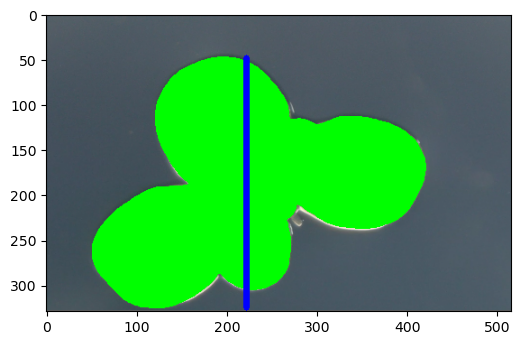

In [50]:
boundary_img1 = pcv.analyze_bound_horizontal(img=img, obj=obj, mask=mask, 
                                                   line_position=1680)

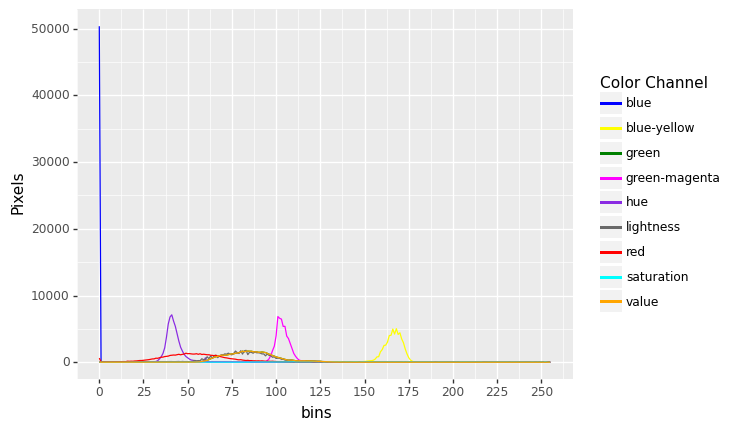

<ggplot: (8753920359841)>


In [54]:
color_histogram = pcv.analyze_color(rgb_img=img, mask=kept_mask, hist_plot_type='all')

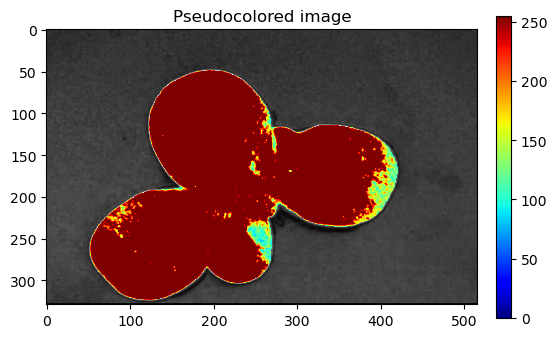

In [55]:
pseudocolored_img = pcv.visualize.pseudocolor(gray_img=s, mask=kept_mask, cmap='jet')